In [1]:
# Capstone: Compare Other ML Models on Final Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load final dataset
file_path = "final_test_dataset_labeled.csv"
df = pd.read_csv(file_path)

# Define features and target
features = df.drop(columns=['Reformulated'])
target = df['Reformulated']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Evaluate models
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4469
           1       0.80      0.41      0.54       117

    accuracy                           0.98      4586
   macro avg       0.89      0.70      0.77      4586
weighted avg       0.98      0.98      0.98      4586


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4469
           1       0.87      0.73      0.79       117

    accuracy                           0.99      4586
   macro avg       0.93      0.86      0.89      4586
weighted avg       0.99      0.99      0.99      4586


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4469
           1       0.88      0.60      0.71       117

    accuracy                           0.99      4586
   macro avg       0.93      0.80      0.85    

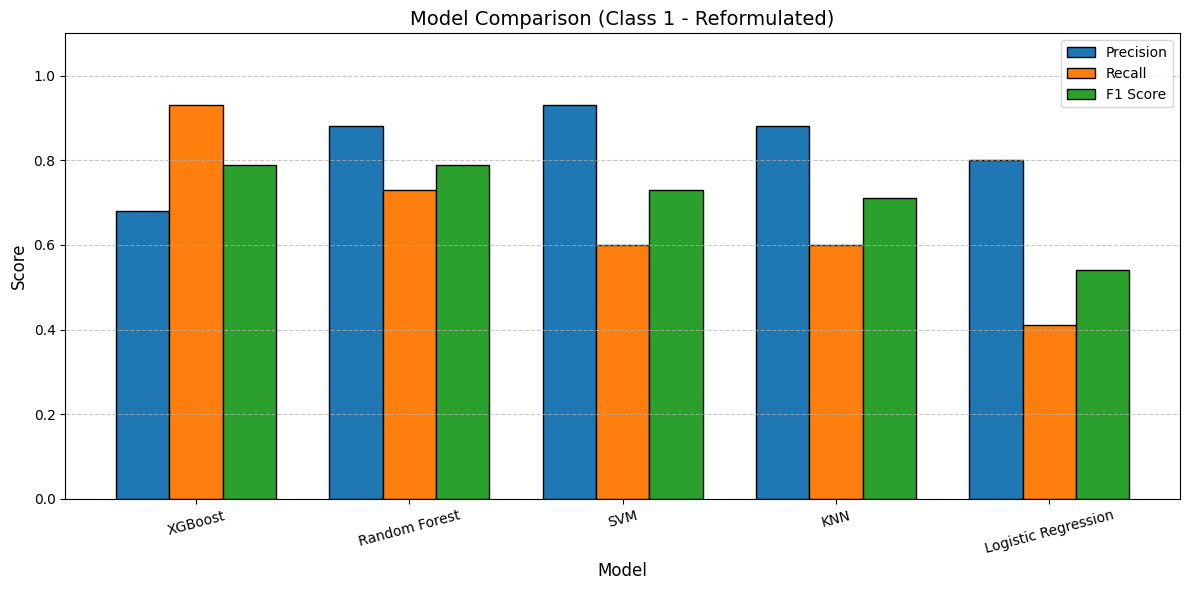

In [2]:
import matplotlib.pyplot as plt

# Model performance metrics for class 1 (Reformulated)
model_names = ["XGBoost", "Random Forest", "SVM", "KNN", "Logistic Regression"]
precision_scores = [0.68, 0.88, 0.93, 0.88, 0.80]
recall_scores = [0.93, 0.73, 0.60, 0.60, 0.41]
f1_scores = [0.79, 0.79, 0.73, 0.71, 0.54]

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, precision_scores, width=bar_width, label='Precision', edgecolor='black')
plt.bar(r2, recall_scores, width=bar_width, label='Recall', edgecolor='black')
plt.bar(r3, f1_scores, width=bar_width, label='F1 Score', edgecolor='black')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Comparison (Class 1 - Reformulated)', fontsize=14)
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=15)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


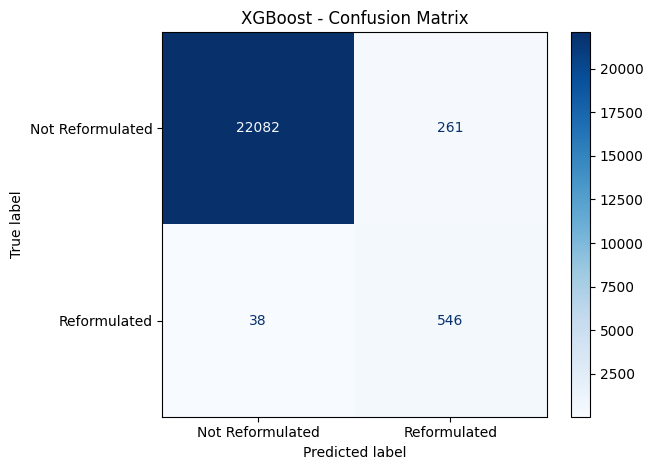

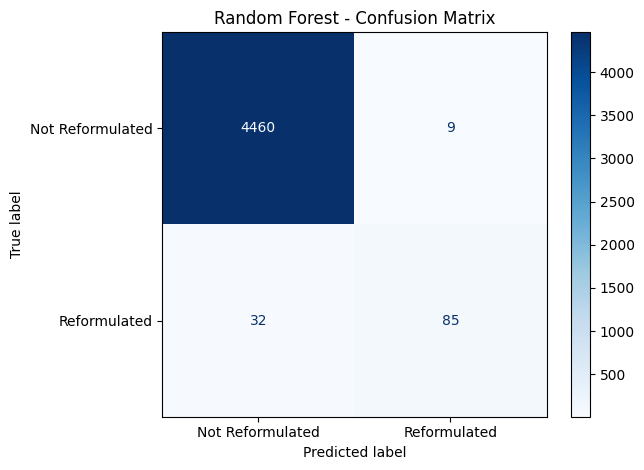

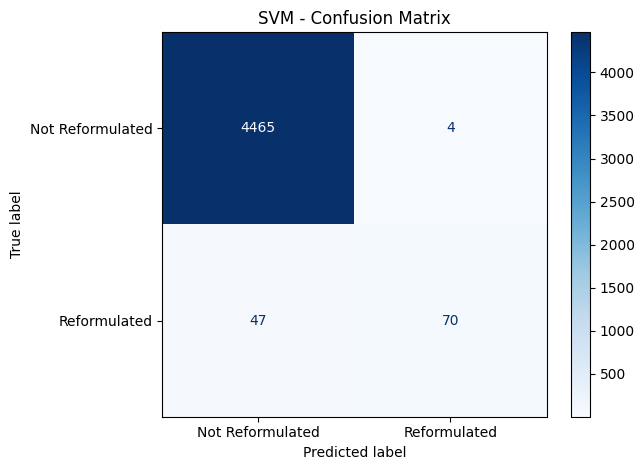

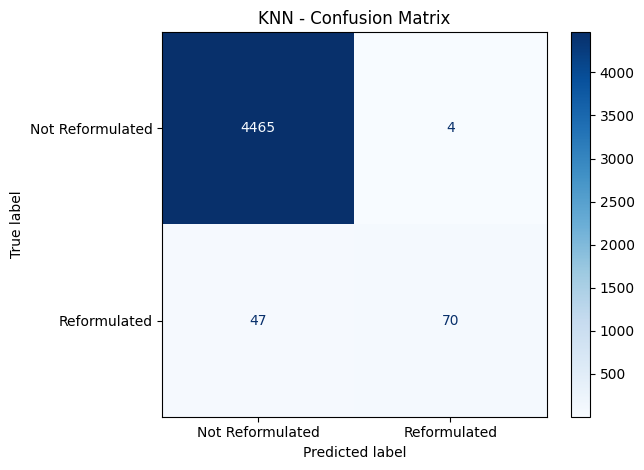

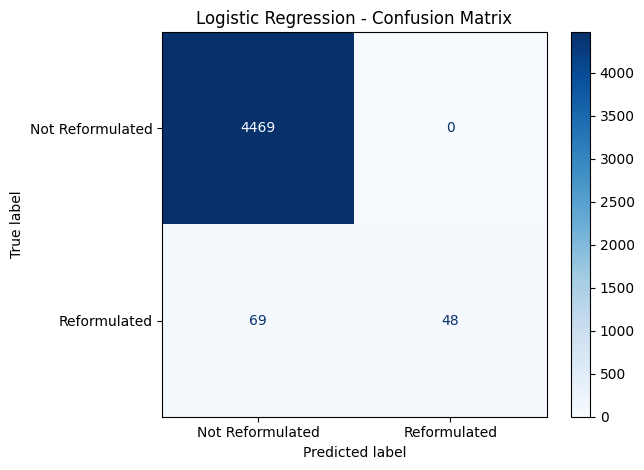

In [6]:
import numpy as np

# Convert confusion matrices to numpy arrays
cms_np = {
    model: np.array(cm) for model, cm in cms.items()
}

# Plot all confusion matrices
for model_name, cm in cms_np.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Reformulated", "Reformulated"])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.show()
